In [1]:
import os

import cv2
import torch
import torch.nn as nn

print(os.getcwd())
device ='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

from model import Resnet

/purestorage/project/youhans/workspace/face_recognition/regularface
cuda


In [2]:
model = Resnet(model_name='resnet50', pretrained=False, num_classes=85742)


/purestorage/project/youhans/minconda3/envs/fr/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/purestorage/project/youhans/minconda3/envs/fr/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
checkpoint_path = '/purestorage/project/youhans/workspace/face_recognition/regularface/outputs/resnet50_elasticarcface/epoch=99_step=255900_Validation loss=3.77.pt.ckpt'
checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=True)
# for key, value in checkpoint['state_dict'].items():
#     print(key)
model.load_state_dict(checkpoint['state_dict'], strict=False)
model.to(device)

Resnet(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [4]:
def preprocess(img):
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
    img = img.transpose(2, 0, 1)

    return img

In [5]:
model.eval()

Resnet(
  (model): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [6]:
name = "Tom"

img1_path = f"./test/{name}1.jpg"
img2_path = f"./test/{name}2.jpg"

print(img1_path)

img1 = cv2.imread(img1_path)
img2 = cv2.imread(img2_path)
print(img1.shape)
# cv2.imshow('output', img1)
# cv2.waitKey(0)
# cv2.imshow('output', img2)
# cv2.waitKey(0)


img1 = preprocess(img1)
img2 = preprocess(img2)

./test/Tom1.jpg
(245, 206, 3)


In [7]:
im01 = torch.from_numpy(img1).float()
im02 = torch.from_numpy(img2).float()
im01 = im01.unsqueeze(0)
im02 = im02.unsqueeze(0)
print(im01.size())
im01 = im01.to(device)
im02 = im02.to(device)

torch.Size([1, 3, 224, 224])


In [8]:
result1 = model(im01)
result2 = model(im02)

In [9]:
# print(result1)
# print(result2)
cos_similarity = nn.CosineSimilarity(dim=1, eps=1e-6)
output = cos_similarity(result1, result2)
print(output)# cv2.imshow('output', img1)
# cv2.waitKey(0)
# cv2.imshow('output', img2)
# cv2.waitKey(0)


tensor([0.9589], device='cuda:0', grad_fn=<SumBackward1>)


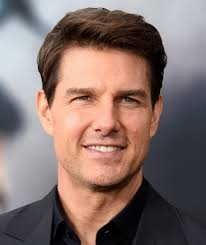

In [10]:
from IPython.display import Image
Image(filename=img1_path)

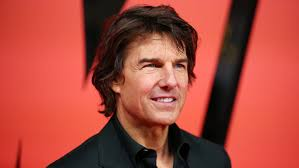

In [11]:
Image(filename=img2_path)